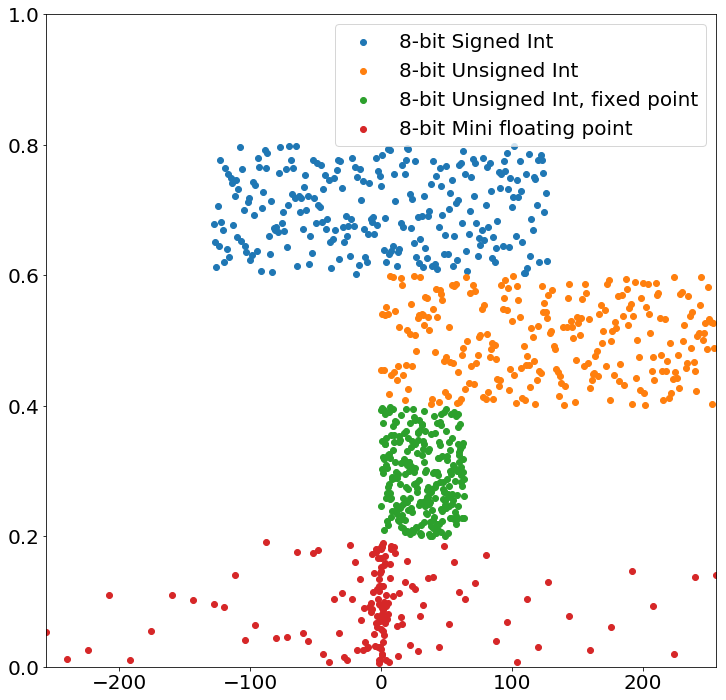

In [0]:
#David Fouhey
#Generating all the Floats/uints/ints/fixedpoints
#UMich EECS 442 Fall 2019

from math import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Everything is too small otherwise
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 20; MEDIUM_SIZE = 30; BIGGER_SIZE = 40
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
###


if __name__ == "__main__":
  #plot everything
  plt.figure(figsize=(12,12))
  
  y = np.ones((256,))
    
  X = np.linspace(0,255,256)
  bias = -1
  floatVals = []
  for sign in [1,-1]:
    for exponent in range(2**4):
      for mantissa in range(2**3):
        exponentUse = exponent
        fractionalPart = 1+float(mantissa)/(2**3)
        #two special cases -- exponent is all 0s or all 1s
        if exponent == 0:
          #sigh denormal numbers
          exponentUse += 1
          fractionalPart = float(mantissa)/(2**3)
        elif exponentUse == 2**4-1:
          #infinity or NAN
          continue
        val = sign * fractionalPart * 2**(exponentUse + bias)
        floatVals.append(val)
  floatVals.sort()
  
  
  #He's how you can use a byte:
  floatVals = np.array(floatVals)
  signedIntVals = np.array(range(-128,128))
  unsignedIntVals = np.array(range(256))
  fixed2PointVals = np.array(range(256)).astype(np.float32) / 4
  
  #whether to show it as a log plot
  SHOW_LOG = False
  #helps to see them as a scatterplot with the y set randomly
  vPattern = lambda n,o: np.random.random(n)*0.2+o
  plt.scatter(signedIntVals,vPattern(256,0.6))
  plt.scatter(unsignedIntVals,vPattern(256,0.4))
  plt.scatter(fixed2PointVals,vPattern(256,0.2))
  plt.scatter(floatVals,vPattern(240,0))
  
  if SHOW_LOG:
    plt.gca().set_xscale('symlog')    
  else:
    plt.gca().set_xscale('linear')
    plt.xlim([-256,256])
  plt.ylim([0,1])
  plt.legend(["8-bit Signed Int","8-bit Unsigned Int","8-bit Unsigned Int, fixed point","8-bit Mini floating point"])
  plt.show()